In [62]:
# libraries
require(eulerr)
require(ggplot2)
require(ggalluvial)
library(VennDiagram)
library(ggplot2)

In [63]:
library(svglite)

In [64]:
community_input_dir <- "../../compare_algorithms/prepare_data/run_community/outs/"
cpdb_input_dir <- "../../compare_algorithms/prepare_data/run_CellPhoneDB/run_algorithm/outs/"
nn_input_dir <- "../../compare_algorithms/prepare_data/run_NicheNet/run_algorithm/outs/"
cellchat_input_dir <- "../../compare_algorithms/prepare_data/run_CellChat/run_algorithm/outs/"

Load data.

In [65]:
suppressWarnings(load(paste0(community_input_dir,"community_interactions.RData")))
print(str(community_interactions))

List of 23
 $ per_sample_anno_interactions:List of 13
  ..$ AML-0024    :'data.frame':	151744 obs. of  29 variables:
  .. ..$ interaction_ID     : chr [1:151744] "Mono:JAG2_Mono:NOTCH1" "Mono:DLL1_Mono:NOTCH1" "Mono:IGF1_Mono:IGF1R" "Mono:JAG1_Mono:NOTCH1" ...
  .. ..$ ligand_gene_name   : chr [1:151744] "JAG2" "DLL1" "IGF1" "JAG1" ...
  .. ..$ receptor_gene_name : chr [1:151744] "NOTCH1" "NOTCH1" "IGF1R" "NOTCH1" ...
  .. ..$ sending_cell_type  : chr [1:151744] "Mono" "Mono" "Mono" "Mono" ...
  .. ..$ receiving_cell_type: chr [1:151744] "Mono" "Mono" "Mono" "Mono" ...
  .. ..$ f_s                : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_r                : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_s_max            : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ f_r_max            : num [1:151744] 0.89 0.89 0.89 0.89 0.89 ...
  .. ..$ a_s_l              : num [1:151744] 0 0 0 0 0.168 ...
  .. ..$ nr_s_l_active      : num [1:151744] 0 0 0 0 917 3190 0 0

In [66]:
suppressWarnings(load(paste0(cpdb_input_dir,"cpdb_interactions.RData")))
print(str(cpdb_interactions))

List of 2
 $ weights          : tibble [5,732 × 14] (S3: tbl_df/tbl/data.frame)
  ..$ interaction_ID: chr [1:5732] "B:ALCAM_NK:CD6" "DC:ALCAM_NK:CD6" "Gran:ALCAM_NK:CD6" "HSPC:ALCAM_NK:CD6" ...
  ..$ AML-0024      : int [1:5732] 0 1 1 0 1 0 1 1 0 1 ...
  ..$ AML-0160      : int [1:5732] 0 0 0 0 0 0 1 1 1 1 ...
  ..$ AML-0693      : int [1:5732] 0 0 0 0 0 1 1 1 1 1 ...
  ..$ AML-1371      : int [1:5732] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ AML-2123      : int [1:5732] 0 0 1 1 1 0 0 1 1 1 ...
  ..$ AML-3133      : int [1:5732] 0 1 1 1 0 0 1 1 1 0 ...
  ..$ AML-4340      : int [1:5732] 0 1 1 1 1 0 1 1 1 1 ...
  ..$ healthy-1     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
  ..$ healthy-2     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
  ..$ healthy-3     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
  ..$ healthy-4     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
  ..$ healthy-4003  : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
  ..$ healthy-5     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
 $ anno_interactions:'data.frame':	5732

In [67]:
suppressWarnings(load(paste0(nn_input_dir,"nn_interactions.RData")))
print(str(nn_interactions))

List of 2
 $ weights          : tibble [10,965 × 14] (S3: tbl_df/tbl/data.frame)
  ..$ interaction_ID: chr [1:10965] "Mono:ACKR3_Mono:CXCR4" "Mono:ALOX5AP_Mono:ALOX5" "Mono:AREG_Mono:ICAM1" "Mono:CASP8_Mono:FAS" ...
  ..$ AML-0024      : num [1:10965] 0.285 3.322 1.609 0.917 3.836 ...
  ..$ AML-0160      : num [1:10965] NA 3.32 1.61 NA 3.84 ...
  ..$ AML-0693      : num [1:10965] NA 3.32 NA NA NA ...
  ..$ AML-1371      : num [1:10965] NA 3.32 NA NA NA ...
  ..$ AML-2123      : num [1:10965] NA 3.32 NA NA NA ...
  ..$ AML-3133      : num [1:10965] NA 3.32 1.61 NA NA ...
  ..$ AML-4340      : num [1:10965] NA 3.32 1.61 NA NA ...
  ..$ healthy-1     : num [1:10965] NA 3.32 1.61 NA 3.84 ...
  ..$ healthy-2     : num [1:10965] NA 3.32 1.61 NA NA ...
  ..$ healthy-3     : num [1:10965] NA 3.32 1.61 NA NA ...
  ..$ healthy-4     : num [1:10965] NA 3.32 NA NA NA ...
  ..$ healthy-4003  : num [1:10965] NA 3.32 NA NA NA ...
  ..$ healthy-5     : num [1:10965] NA NA NA NA NA ...
 $ anno_interact

In [68]:
suppressWarnings(load(paste0(cellchat_input_dir,"cellchat_interactions.RData")))
print(str(cellchat_interactions))

List of 2
 $ weights          :'data.frame':	4806 obs. of  12 variables:
  ..$ AML-0024 : num [1:4806] 0.006994 0.005992 0.000941 0.000805 0.010007 ...
  ..$ AML-0160 : num [1:4806] NA NA NA NA 5.47e-05 ...
  ..$ AML-0693 : num [1:4806] 0.00788 0.00199 NA NA NA ...
  ..$ AML-1371 : num [1:4806] 0.0363 0.0287 0.0143 0.0112 NA ...
  ..$ AML-2123 : num [1:4806] NA NA NA NA NA NA NA NA NA NA ...
  ..$ AML-3133 : num [1:4806] 0.01865 0.01137 0.00172 0.00104 NA ...
  ..$ AML-4340 : num [1:4806] NA NA NA NA NA NA NA NA NA NA ...
  ..$ healthy-1: num [1:4806] NA NA NA NA NA ...
  ..$ healthy-2: num [1:4806] 0.000878 0.000282 NA NA NA ...
  ..$ healthy-3: num [1:4806] 0.00828 0.00545 0.00198 0.0013 NA ...
  ..$ healthy-4: num [1:4806] 0.002248 0.000869 NA NA NA ...
  ..$ healthy-5: num [1:4806] 0.001571 0.001666 0.000815 0.000864 NA ...
 $ anno_interactions:'data.frame':	4806 obs. of  24 variables:
  ..$ sending_celltype  : Factor w/ 8 levels "B","DC","Ery",..: 7 8 7 8 6 6 6 6 4 6 ...
  ..$ rec

In [69]:
# check if all interaction IDs for CPDB are in community (all)
all(cpdb_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

In [70]:
# check if all interaction IDs for NN are in community (all)
all(nn_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

In [71]:
# check if all interaction IDs for NN are in community (all)
all(nn_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

In [72]:
# check if all interaction IDs for CellChat are in community (all)
all(cellchat_interactions$anno_interactions$interaction_ID %in% community_interactions$anno_interactions$interaction_ID)

[1] TRUE

# plot data

## Euler diagram of differential interactions

In [73]:
# index of significant interactions in community
idx_sign <- !is.na(community_interactions$anno_interactions$sign) & community_interactions$anno_interactions$sign

In [74]:
community_set1 <- community_interactions$anno_interactions$interaction_ID[idx_sign]
NicheNet_set2 <- nn_interactions$anno_interactions$interaction_ID
CellPhoneDB_set3 <- cpdb_interactions$anno_interactions$interaction_ID
CellChat_set4 <- cellchat_interactions$anno_interactions$interaction_ID

In [75]:
 venn_list <- list(
    set1 = community_set1,
    set2 = NicheNet_set2,
    set3 = CellPhoneDB_set3,
    set4 = CellChat_set4
  )

In [76]:
set_sizes <- c(length(community_set1), length(NicheNet_set2), length(CellPhoneDB_set3), length(CellChat_set4))

category_names <- paste0(
    c("community", "NicheNet", "CPDB", "CellChat"), 
    "\n(", set_sizes, ")"
  )

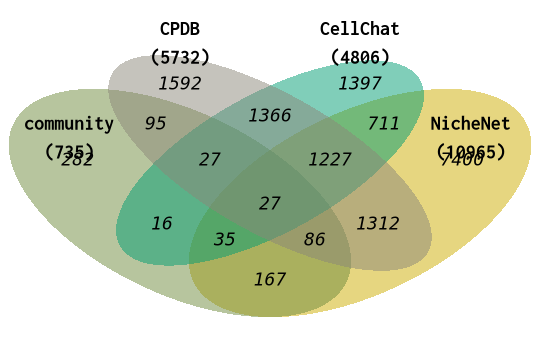

In [77]:
venn.plot <- venn.diagram(
    x = venn_list,
    category.names = c(" ", "  ", "   ", "    "),  
    lwd = 2,
    lty = 'blank',
    fill = c("darkolivegreen4", "gold3", "cornsilk4", "#009E73"),
    cex = 0,
    fontface = "italic",
    cat.cex = 1,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.055, 0.055, 0.1, 0.1),
    filename = NULL,  
    output = TRUE
  )
  
  ggsave(file="outs/differential_interactions_.png", plot=venn.plot, width=10, height=8, dpi = 300)
  grid.draw(venn.plot)

In [78]:
# int_list <- list(community = community_interactions$anno_interactions$interaction_ID[idx_sign]
#                 ,NicheNet = nn_interactions$anno_interactions$interaction_ID
#                 ,CellPhoneDB = cpdb_interactions$anno_interactions$interaction_ID
#                 ,CellChat = cellchat_interactions$anno_interactions$interaction_ID
#                 )

# # add numbers to the names
# numbers <- c(sum(idx_sign)
#             ,length(nn_interactions$anno_interactions$interaction_ID)
#             ,length(cpdb_interactions$anno_interactions$interaction_ID)
#             ,length(cellchat_interactions$anno_interactions$interaction_ID)
#             )
# names(int_list) <- paste0(names(int_list)
#                          ,"\n"
#                          ,"("
#                          ,numbers
#                          ,")")

# plot(euler(int_list
#           )
#      ,fills = c(community = "darkolivegreen4"
#                 ,NicheNet = "gold3"
#                 ,CellPhoneDB = "cornsilk4"#"rosybrown"
#                )
#      ,alpha=c(1,0.5,0.5)
#      ,quantities = list(fontsize = 12)
#     )

## Interactions stratified by quality

In [79]:
# index of good interactions for community
idx_good <- community_interactions$anno_interactions$passed_QC_filter

In [80]:
# stacked bar
id_good <- community_interactions$anno_interactions$interaction_ID[idx_good]
id_bad <- community_interactions$anno_interactions$interaction_ID[!idx_good]
data <- data.frame(algorithm = c("CPDB"
                                 ,"CPDB"
                                 ,"NicheNet"
                                 , "NicheNet"
                                 ,"CellChat"
                                 ,"CellChat"
                                )
                  ,quality_by_community = c("good"
                                           ,"bad"
                                           ,"good"
                                           ,"bad"
                                           ,"good"
                                           ,"bad"
                                            
                                           )
                  ,number = c(sum(cpdb_interactions$anno_interactions$interaction_ID %in% id_good)
                              ,sum(cpdb_interactions$anno_interactions$interaction_ID %in% id_bad)
                              ,sum(nn_interactions$anno_interactions$interaction_ID %in% id_good)
                              ,sum(nn_interactions$anno_interactions$interaction_ID %in% id_bad)
                              ,sum(cellchat_interactions$anno_interactions$interaction_ID %in% id_good)
                              ,sum(cellchat_interactions$anno_interactions$interaction_ID %in% id_bad)
                             )
                  )

  algorithm quality_by_community number
1      CPDB                 good   2835
2      CPDB                  bad   2897
3  NicheNet                 good   4542
4  NicheNet                  bad   6423
5  CellChat                 good   2347
6  CellChat                  bad   2459


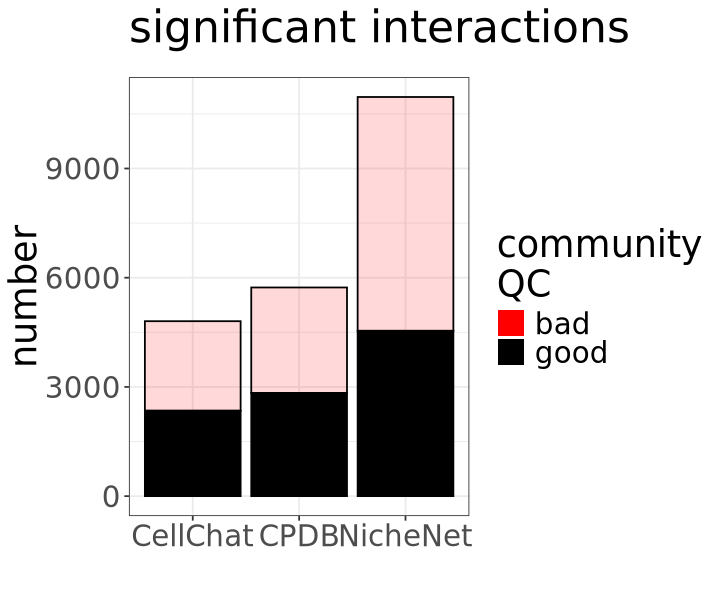

In [81]:
print(data)
options(repr.plot.width = 6
       ,repr.plot.height = 5)
plot <- ggplot(data
       , aes(x=algorithm
             , y=number
             ,fill=quality_by_community 
             ,color=quality_by_community
             ,alpha=quality_by_community
            )
      ) + 
    geom_bar(position="stack"
             ,stat="identity"
            )+
xlab("")+
ggtitle("significant interactions")+
scale_fill_manual(name = "community\nQC"
                   ,values = c("red","black")
                   )+
scale_color_manual(name= NULL
                  ,values = c("black","black")
                  ,guide = "none")+
scale_alpha_manual(name= NULL
                  ,values = c(0.15,1)
                  ,guide = "none"
                  )+
theme_bw()+
theme(text = element_text(size=22)
      ,plot.title = element_text(margin = margin(t = 0, r = 0, b = 15, l = 0))
     )

ggsave(file="outs/significant_interactions_QC.png", plot=plot, width=10, height=8, dpi = 300)

plot

In [82]:
plot_nr_samples <- function(my_df
                           ,name){
    options(repr.plot.height = 5
        ,repr.plot.width = 5)
plot <- ggplot(data = my_df
      ,aes(x = number_healthy
          ,y = number_aml
          )
      )+
geom_jitter()+
theme_bw()+
xlab("number of healthy samples")+
ylab("number of AML samples")+
theme(text = element_text(size=22)
      ,plot.title = element_text(margin = margin(t = 0, r = 0, b = 15, l = 0))
      ,axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0))
     )+
ggtitle(name)
    ggsave(file=paste0("outs/", name, "_nr_samples.jpeg"), plot=plot, width=10, height=8)

}

In [83]:
rownames(community_interactions$weights) <- community_interactions$weights$interaction_ID
rownames(cpdb_interactions$weights) <- cpdb_interactions$weights$interaction_ID
rownames(nn_interactions$weights) <- nn_interactions$weights$interaction_ID
# rownames(cellchat_interactions$weights) <- cellchat_interactions$weights$interaction_ID

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [84]:
# sample coverage: community
idx_case <- community_interactions$anno_samples$case_or_control == "case"
non_zero_weights <- community_interactions$weights[idx_sign,] !=0
df <- data.frame(interaction_ID = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,number_healthy = rowSums(non_zero_weights[,!idx_case])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )

plot_nr_samples(df,"community")

In [85]:
idx_case <- grepl("AML",colnames(cpdb_interactions$weights))
non_zero_weights <- cpdb_interactions$weights !=0

In [86]:
sum(idx_case)

[1] 7

In [87]:
idx_control <- grepl("healthy",colnames(cpdb_interactions$weights))

In [88]:
sum(idx_control)

[1] 6

In [89]:
# sample coverage: CPDB
idx_case <- grepl("AML",colnames(cpdb_interactions$weights))
idx_control <- grepl("healthy",colnames(cpdb_interactions$weights))
non_zero_weights <- cpdb_interactions$weights !=0
str(cpdb_interactions$weights)
str(non_zero_weights)
df_cpdb <- data.frame(interaction_ID = rownames(cpdb_interactions$weights)
                ,number_healthy = rowSums(non_zero_weights[,idx_control])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )


plot_nr_samples(df_cpdb, "CellPhoneDB")

tibble [5,732 × 14] (S3: tbl_df/tbl/data.frame)
 $ interaction_ID: chr [1:5732] "B:ALCAM_NK:CD6" "DC:ALCAM_NK:CD6" "Gran:ALCAM_NK:CD6" "HSPC:ALCAM_NK:CD6" ...
 $ AML-0024      : int [1:5732] 0 1 1 0 1 0 1 1 0 1 ...
 $ AML-0160      : int [1:5732] 0 0 0 0 0 0 1 1 1 1 ...
 $ AML-0693      : int [1:5732] 0 0 0 0 0 1 1 1 1 1 ...
 $ AML-1371      : int [1:5732] 1 1 1 1 1 1 1 1 1 1 ...
 $ AML-2123      : int [1:5732] 0 0 1 1 1 0 0 1 1 1 ...
 $ AML-3133      : int [1:5732] 0 1 1 1 0 0 1 1 1 0 ...
 $ AML-4340      : int [1:5732] 0 1 1 1 1 0 1 1 1 1 ...
 $ healthy-1     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
 $ healthy-2     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
 $ healthy-3     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
 $ healthy-4     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
 $ healthy-4003  : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
 $ healthy-5     : int [1:5732] 0 0 0 0 0 0 1 1 1 0 ...
 logi [1:5732, 1:14] TRUE TRUE TRUE TRUE TRUE TRUE ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5732] "B:A

In [90]:
# sample coverage:NN
idx_case <- grepl("AML",colnames(nn_interactions$weights))
idx_control <- grepl("healthy",colnames(nn_interactions$weights))
non_zero_weights <- !is.na(nn_interactions$weights)
df_nn <- data.frame(interaction_ID = rownames(nn_interactions$weights)
                ,number_healthy = rowSums(non_zero_weights[,idx_control])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )


plot_nr_samples(df_nn, "NicheNet")

In [91]:
length(df_cpdb$interaction_ID)

[1] 5732

In [92]:
length(df_nn$interaction_ID)

[1] 10965

In [93]:
# sample coverage:NN
idx_case <- grepl("AML",colnames(cellchat_interactions$weights))
idx_control <- grepl("healthy",colnames(cellchat_interactions$weights))
non_zero_weights <- !is.na(cellchat_interactions$weights)
df_cc <- data.frame(interaction_ID = rownames(cellchat_interactions$weights)
                ,number_healthy = rowSums(non_zero_weights[,idx_control])
                ,number_aml = rowSums(non_zero_weights[,idx_case])
                )


plot_nr_samples(df_cc, "CellChat")

In [94]:
idx_good_cpdb <- df_cpdb$number_healthy >= 5 | df_cpdb$number_aml >= 5
idx_good_nn <- df_nn$number_healthy >= 5 | df_nn$number_aml >= 5
idx_good_cc <- df_cc$number_healthy >= 5 | df_cc$number_aml >= 5

In [95]:
# cellchat_interactions$weights

In [96]:
community_set1 <- community_interactions$anno_interactions$interaction_ID[idx_sign]
NicheNet_set2 <- df_nn$interaction_ID[idx_good_nn]
CellPhoneDB_set3 <- df_cpdb$interaction_ID[idx_good_cpdb]
CellChat_set4 <- df_cc$interaction_ID[idx_good_cc]

In [97]:
 venn_list <- list(
    set1 = community_set1,
    set2 = NicheNet_set2,
    set3 = CellPhoneDB_set3,
    set4 = CellChat_set4
  )

In [98]:
set_sizes <- c(length(community_set1), length(NicheNet_set2), length(CellPhoneDB_set3), length(CellChat_set4))

category_names <- paste0(
    c("community", "NicheNet", "CPDB", "CellChat"), 
    "\n(", set_sizes, ")"
  )

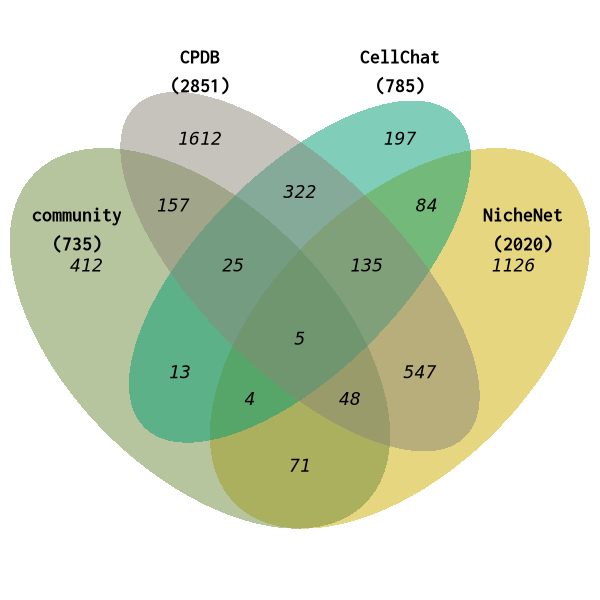

In [99]:
venn.plot <- venn.diagram(
    x = venn_list,
    category.names = c(" ", "  ", "   ", "    "),  
    lwd = 2,
    lty = 'blank',
    fill = c("darkolivegreen4", "gold3", "cornsilk4", "#009E73"),
    cex = 0,
    fontface = "italic",
    cat.cex = 1,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.dist = c(0.055, 0.055, 0.1, 0.1),
    filename = NULL,  
    output = TRUE
  )
  
  ggsave(file="outs/good_QC_interactions_.png", plot=venn.plot, width=10, height=8, dpi = 300)
  grid.draw(venn.plot)

List of 4
 $ community  : chr [1:735] "Mono:RETN_Mono:CAP1" "Mono:ANXA1_Gran:FPR1" "Mono:RETN_Gran:CAP1" "Mono:GNAI2_Gran:FPR1" ...
 $ NicheNet   : chr [1:2020] "Mono:ALOX5AP_Mono:ALOX5" "Mono:CCR1_Mono:MBP" "Mono:CCR1_Mono:PRNP" "Mono:CD14_Mono:ITGA4" ...
 $ CellPhoneDB: chr [1:2851] "Gran:ALCAM_NK:CD6" "DC:ALCAM_T:CD6" "Gran:ALCAM_T:CD6" "HSPC:ALCAM_T:CD6" ...
 $ CellChat   : chr [1:785] "Mono:TNFSF13B_B:TNFRSF13C" "Mono:SERPINA1_Mono:LRP1" "Mono:ANXA1_Mono:FPR1" "Mono:S100A8_Mono:TLR4" ...
NULL


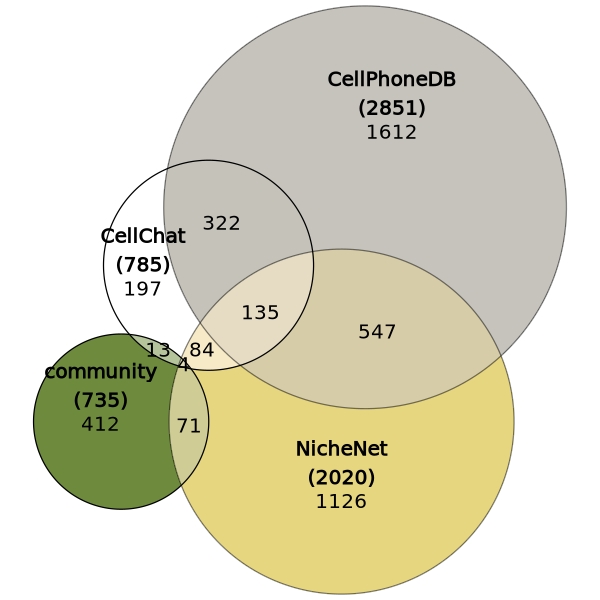

In [100]:
idx_good_cpdb <- df_cpdb$number_healthy >= 5 | df_cpdb$number_aml >= 5
idx_good_nn <- df_nn$number_healthy >= 5 | df_nn$number_aml >= 5
idx_good_cc <- df_cc$number_healthy >= 5 | df_cc$number_aml >= 5


int_list <- list(community = community_interactions$anno_interactions$interaction_ID[idx_sign]
                ,NicheNet = df_nn$interaction_ID[idx_good_nn]
                ,CellPhoneDB = df_cpdb$interaction_ID[idx_good_cpdb]
                ,CellChat = df_cc$interaction_ID[idx_good_cc]
                )
print(str(int_list))

# add numbers to the names
numbers <- c(sum(idx_sign)
            ,sum(idx_good_nn)
            ,sum(idx_good_cpdb)
            ,sum(idx_good_cc)
            )
names(int_list) <- paste0(names(int_list)
                         ,"\n"
                         ,"("
                         ,numbers
                         ,")")

plot(euler(int_list
         # , shape = "ellipse"
          )
     ,fills = c(community = "darkolivegreen4"
                ,NicheNet = "gold3"
                ,CellPhoneDB = "cornsilk4"#"rosybrown"
               )
     ,alpha=c(1,0.5,0.5)
     ,quantities = list(fontsize = 12)
    )

## Alluvial plot of interactions

The direction of interaction chnges for CPDB and NN will be defined by using the log2FC of the ligand and the receptor. If one or both are upregulated, then the interaction is upregulated. If one or both are downregulated, the interaction is downregulated. If the ligand and the receptor is changed in the disconcordant direciton, then the interaction is ambigous.

In [101]:
head(cpdb_interactions$anno_interactions) 

,interaction_ID,sender_celltype,sender_gene,receiver_celltype,receiver_gene,ligand_log2FC,ligand_p_val_adj,receptor_log2FC,receptor_p_val_adj,direction,direction_lig,direction_rec,direction_lig_rec
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,B:ALCAM_NK:CD6,B,ALCAM,NK,CD6,NA,NA,0.2900217,5.625314e-50,up,NA,up,NA_up
2,DC:ALCAM_NK:CD6,DC,ALCAM,NK,CD6,NA,NA,0.2900217,5.625314e-50,up,NA,up,NA_up
3,Gran:ALCAM_NK:CD6,Gran,ALCAM,NK,CD6,NA,NA,0.2900217,5.625314e-50,up,NA,up,NA_up
4,HSPC:ALCAM_NK:CD6,HSPC,ALCAM,NK,CD6,NA,NA,0.2900217,5.625314e-50,up,NA,up,NA_up
5,Mono:ALCAM_NK:CD6,Mono,ALCAM,NK,CD6,NA,NA,0.2900217,5.625314e-50,up,NA,up,NA_up
6,B:ALCAM_T:CD6,B,ALCAM,T,CD6,NA,NA,0.2785492,7.678829e-119,up,NA,up,NA_up


In [102]:
head(nn_interactions$anno_interactions) 

,interaction_ID,sender_celltype,sender_gene,receiver_celltype,receiver_gene,ligand_log2FC,ligand_p_val_adj,receptor_log2FC,receptor_p_val_adj,direction_lig,direction_rec,direction_lig_rec,direction
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Mono:ACKR3_Mono:CXCR4,Mono,ACKR3,Mono,CXCR4,0.3832868,0.000000e+00,0.4670962,0,up,up,up_up,up
2,Mono:ALOX5AP_Mono:ALOX5,Mono,ALOX5AP,Mono,ALOX5,0.3453332,4.466068e-239,NA,NA,up,NA,up_NA,up
3,Mono:AREG_Mono:ICAM1,Mono,AREG,Mono,ICAM1,NA,NA,NA,NA,NA,NA,NA_NA,ambigous
4,Mono:CASP8_Mono:FAS,Mono,CASP8,Mono,FAS,NA,NA,NA,NA,NA,NA,NA_NA,ambigous
5,Mono:CCL3L1_Mono:CCR1,Mono,CCL3L1,Mono,CCR1,NA,NA,NA,NA,NA,NA,NA_NA,ambigous
6,Mono:CCR1_Mono:MBP,Mono,CCR1,Mono,MBP,NA,NA,NA,NA,NA,NA,NA_NA,ambigous


In [103]:
#Assigned CPDB directions

In [104]:
# assign direction to the intersctions in community
idx_down <- community_interactions$anno_interactions$log2FC_weights < 0
idx_up <- community_interactions$anno_interactions$log2FC_weights > 0

community_interactions$anno_interactions$direction <- NA
community_interactions$anno_interactions$direction[idx_down] <- "down"
community_interactions$anno_interactions$direction[idx_up] <- "up"
community_interactions$anno_interactions$direction[!idx_sign] <- "not significant"

In [105]:
table(community_interactions$anno_interactions$direction)


           down not significant              up 
            726          151009               9 

In [106]:
table(cpdb_interactions$anno_interactions$direction)


ambigous     down       up 
     164     2289     3279 

In [107]:
table(nn_interactions$anno_interactions$direction)


ambigous     down       up 
    8394     1123     1448 

In [108]:
table(cellchat_interactions$anno_interactions$direction)


ambigous     down       up 
    1161      194     3451 

In [109]:
int_alluvial <- unique(c(community_interactions$anno_interactions$interaction_ID[idx_sign]
                         ,df_cpdb$interaction_ID[idx_good_cpdb]
                         ,df_nn$interaction_ID[idx_good_nn]
                         ,df_cc$df_cc$interaction_ID[idx_good_cc]
                            )
                )
print(str(int_alluvial))

 chr [1:4561] "Mono:RETN_Mono:CAP1" "Mono:ANXA1_Gran:FPR1" ...
NULL


In [110]:
# prepare the df for plotting
# all three algorithms
rownames(community_interactions$anno_interactions) <- community_interactions$anno_interactions$interaction_ID
rownames(cpdb_interactions$anno_interactions) <- cpdb_interactions$anno_interactions$interaction_ID
rownames(nn_interactions$anno_interactions) <- nn_interactions$anno_interactions$interaction_ID
rownames(cellchat_interactions$anno_interactions) <- cellchat_interactions$anno_interactions$interaction_ID

df_facets <- data.frame(interaction_ID = int_alluvial
                       ,community_sign = community_interactions$anno_interactions[int_alluvial,"sign"]
                       ,community_log2FC_weights = community_interactions$anno_interactions[int_alluvial,"log2FC_weights"]
                        ,community = rep(NA,length(int_alluvial))
                       ,CellPhoneDB = cpdb_interactions$anno_interactions[int_alluvial,"direction"]
                       ,NicheNet = nn_interactions$anno_interactions[int_alluvial,"direction"]
                       ,CellChat = cellchat_interactions$anno_interactions[int_alluvial,"direction"] 
                       )

# simplify the categories for community
df_facets$community_sign[is.na(df_facets$community_sign)] <- FALSE

df_facets$community[(df_facets$community_sign) & (df_facets$community_log2FC_weights > 1)] <- "up"
df_facets$community[(df_facets$community_sign) & (df_facets$community_log2FC_weights < -1)] <- "down"
df_facets$community[!df_facets$community_sign] <- "not\nsignificant"

# present in community but not in CPDB
df_facets$CellPhoneDB[is.na(df_facets$CellPhoneDB)] <- "not\nsignificant"

# present in community but not in NN
df_facets$NicheNet[is.na(df_facets$NicheNet)] <- "not\nsignificant"

# present in community but not in CellChat
df_facets$CellChat[is.na(df_facets$CellChat)] <- "not\nsignificant"

df_facets$comparison <- sapply(1:nrow(df_facets)
                               ,function(i) {
                                   paste(df_facets[i,c("community","CellPhoneDB","NicheNet","CellChat")]
                                        ,collapse = " ")
                               })

df_facets$freq <- table(df_facets$comparison)[df_facets$comparison]
df_facets <- df_facets[!duplicated(df_facets$comparison),]


df_facets$community <- factor(df_facets$community
                                  ,levels = c("up"
                                              ,"down"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

df_facets$CellPhoneDB <- factor(df_facets$CellPhoneDB
                                  ,levels = c("up"
                                              ,"down"
                                              ,"ambigous"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

df_facets$NicheNet <- factor(df_facets$NicheNet
                                  ,levels = c("up"
                                              ,"down"
                                              ,"ambigous"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

df_facets$CellChat <- factor(df_facets$CellChat
                                  ,levels = c("up"
                                              ,"down"
                                              ,"ambigous"
                                              ,"not\nsignificant"
                                             )
                                  ,ordered = TRUE)

print((df_facets))

              interaction_ID community_sign community_log2FC_weights
1        Mono:RETN_Mono:CAP1           TRUE             -1.166357016
2       Mono:ANXA1_Gran:FPR1           TRUE            -14.978926220
3        Mono:RETN_Gran:CAP1           TRUE             -1.296068723
4       Mono:GNAI2_Gran:FPR1           TRUE            -14.896663635
5      Mono:CD14_Gran:PLXND1           TRUE             -5.493990143
14       Mono:LGALS1_B:PTPRC           TRUE             -2.455354477
22         Mono:HLA-C_B:CD81           TRUE             -2.946329797
24           Mono:MIF_B:CD74           TRUE             -1.917381937
29       Mono:ARF6_HSPC:PLD1           TRUE              6.491996642
33     Mono:S100A9_HSPC:CD68           TRUE              6.545726007
45       Mono:UBC_HSPC:SMAD3           TRUE             -3.128388848
46       Mono:TIMP1_Ery:CD63           TRUE             -3.983746245
81       Mono:BST2_DC:LILRA4           TRUE             -7.767006809
82       Mono:THBS1_DC:ITGA4      

In [111]:
# prepare colors for plotting
category_colors <- c("not\nsignificant" = "gray90"
                     ,"down" = "lightslateblue"
                     ,"up" = "red3"
                     ,"ambigous" = "darkorchid1"
                    )

In [112]:
levels(df_facets$community)

[1] "up"               "down"             "not\nsignificant"

In [113]:
levels(df_facets$CellPhoneDB)

[1] "up"               "down"             "ambigous"         "not\nsignificant"

In [114]:
levels(df_facets$NicheNet)

[1] "up"               "down"             "ambigous"         "not\nsignificant"

In [115]:
levels(df_facets$CellChat)

[1] "up"               "down"             "ambigous"         "not\nsignificant"

Don't know how to automatically pick scale for object of type <table>. Defaulting to continuous.
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Don't know how to automatically pick scale for object of type <table>. Defaulting to continuous.
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form

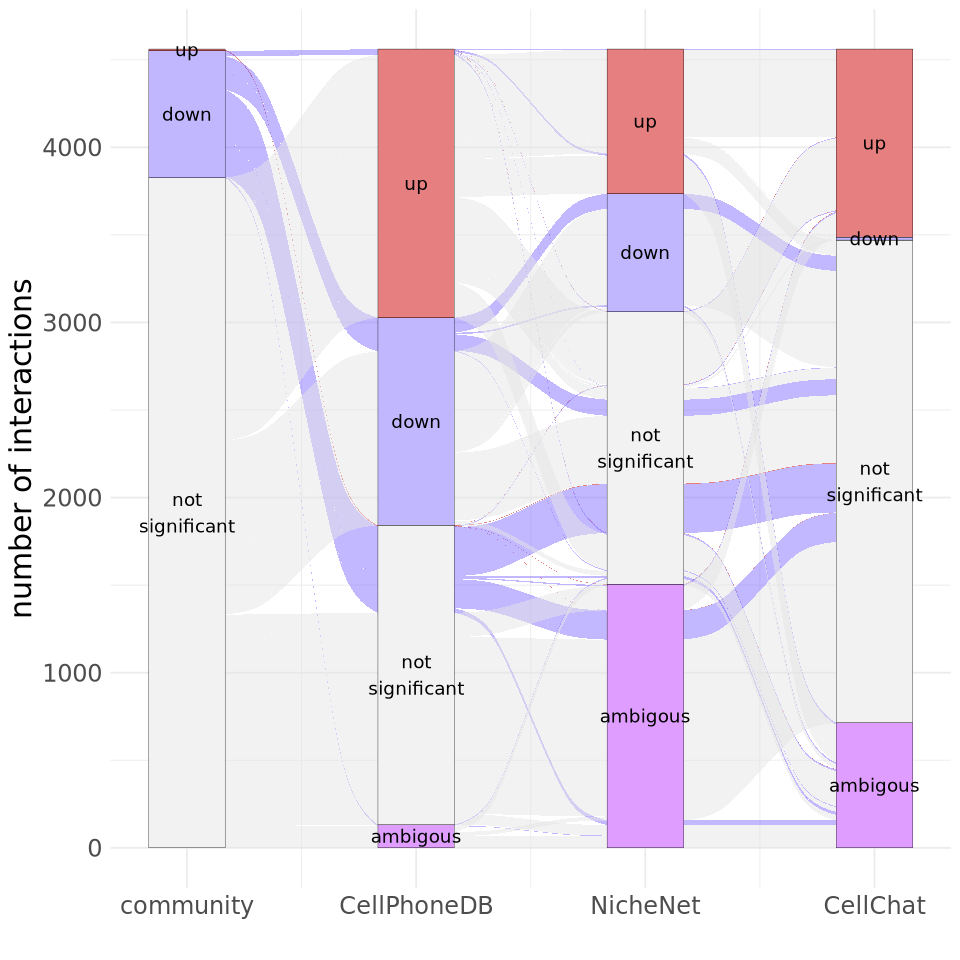

In [116]:
# plot alluvial

options(repr.plot.width = 8
       ,repr.plot.height = 8
       )
alluvial_plot <- ggplot(df_facets,
       aes(y = freq,
           axis1 = community 
           ,axis2 = CellPhoneDB
           ,axis3 = NicheNet
           ,axis4 = CellChat
          )
      ) +
geom_alluvium(aes(fill = community)
            #,width = 1/4
             )+
scale_fill_manual(values = category_colors)+
geom_stratum(fill = "white"
            ,linewidth = 0
            #,width = 0.55
            )+
geom_stratum(alpha = 0.5
             ,fill = category_colors[c("not\nsignificant"
                                       ,"down"
                                       ,"up"
                                       
                                      ,"ambigous"
                                       ,"not\nsignificant"
                                       ,"down"
                                       ,"up"
                                      
                                      ,"ambigous"
                                       ,"not\nsignificant"
                                       ,"down"
                                       ,"up"

                                       ,"ambigous"
                                       ,"not\nsignificant"
                                       ,"down"
                                       ,"up"
                                      )
                                    ]
            ,linewidth = 0.1
            )+
geom_text(stat = "stratum"
          ,aes(label = after_stat(stratum))
         ) +
ylab("number of interactions")+
xlab("")+
scale_x_continuous(breaks = 1:4
                   ,labels = c("community", "CellPhoneDB", "NicheNet","CellChat")
                   
                  ) +
theme_minimal()+
theme(legend.position="none"
     ,text = element_text(size = 18)
     )

ggsave(file="outs/significant_interactions_QC.png", plot=alluvial_plot, width=10, height=8, dpi = 300)

alluvial_plot

## Mono:HMGB1_T:CXCR4 interaction

In [117]:
plot_fractions <- function(interaction_ID
                           ,send_or_rec
                           ,health_status
                           ,colors
                          ,my_interactions
                           ,filename
                          ,plot.width=3.5){
    idx_my_interaction <- community_interactions$anno_interactions$interaction_ID == interaction_ID

    ifelse(send_or_rec == "sender"
          ,which_fraction  <-  "f_s"
          ,which_fraction  <- "f_r")
    df <- data.frame(fraction = unlist(my_interactions[[which_fraction]][idx_my_interaction,])
                    ,health_status = my_interactions$anno_samples$health_status
                     ,sample_ID = my_interactions$anno_samples$sample_ID
                    )
    
    # check if we need to re-assign health_status
    if("monocytic\nAML" %in% health_status){
        idx_AML_mono <- df$sample_ID %in% c("AML-0024","AML-0160")
        idx_AML <- grepl("AML",df$sample_ID)
        df$health_status[idx_AML_mono] <- "monocytic\nAML"
        df$health_status[idx_AML & !idx_AML_mono] <- "other\nAML"
    }
    
    df$health_status <- factor(df$health_status
                              ,levels = health_status
                              ,ordered = TRUE)
    
    ifelse(send_or_rec == "sender"
          ,cell_type <- "monocytes"
          ,cell_type <- "T cells"
          )
    
    
    options(repr.plot.height = 3
        ,repr.plot.width = plot.width)
    
    plot <- ggplot(data = df
          ,aes(x = health_status
              ,y = fraction
              ,fill = health_status)
          )+
    geom_boxplot(show.legend = FALSE
                ,alpha = 0.75)+
    geom_point(show.legend = FALSE)+
    scale_fill_manual(values = colors)+
    xlab("")+
    ylab("cell type abundance")+
    ggtitle(paste0(send_or_rec, ": ",cell_type))+
    theme_bw()+
    theme(text = element_text(size=18)
          ,axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))
          ,axis.ticks.x = element_blank()
          ,axis.text.x=element_text(size=18)
         )

    ggsave(file=filename, plot=plot, width=10, height=8, dpi = 300)

    plot
}

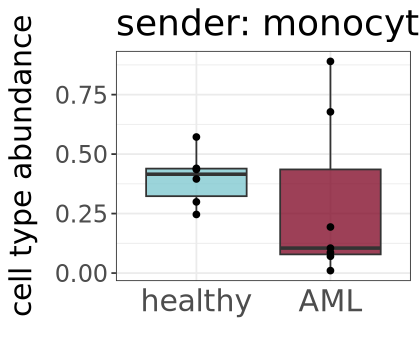

In [118]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"sender"
               ,c("healthy", "AML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F") # bordeau for AML
              ,community_interactions, "outs/mono_sender.png")

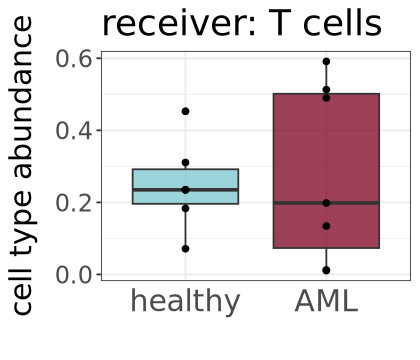

In [119]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"receiver"
               ,c("healthy", "AML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F") # bordeau for AML
              ,community_interactions, "outs/t_receiver.png")

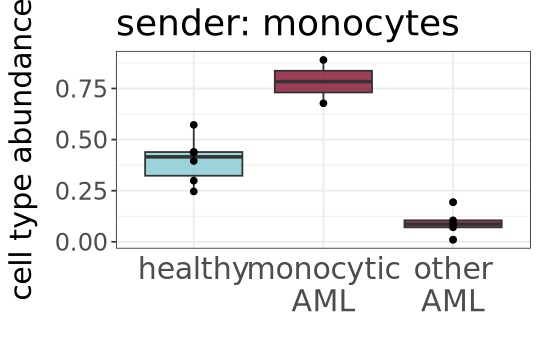

In [120]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"sender"
               ,c("healthy", "monocytic\nAML", "other\nAML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F" # bordeau for AML
                 ,"#7C001F") # bordeau for AML_mono
              ,community_interactions
               ,"outs/monocytic_sender.png"
              ,plot.width = 4.5)

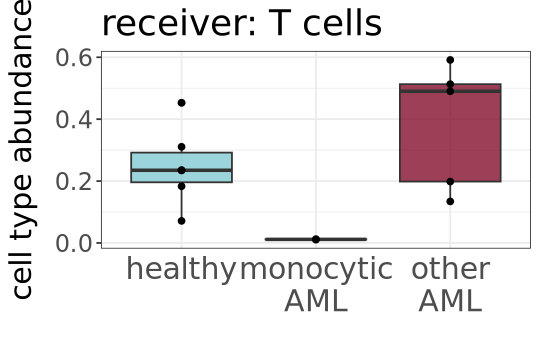

In [121]:
plot_fractions("Mono:HMGB1_T:CXCR4"
              ,"receiver"
               ,c("healthy", "monocytic\nAML", "other\nAML")
               ,c("#7ac5cd" # CadetBlue3 for healthy
                 ,"#7C001F" # bordeau for AML
                 ,"#7C001F") # bordeau for AML_mono
              ,community_interactions
              ,"outs/monocytic_sender.png"
              ,plot.width = 4.5)

In [122]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-conda-linux-gnu
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/project/ladcol_011/conda_path/miniconda3/envs/cellchat/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] svglite_2.1.3       VennDiagram_1.7.3   futile.logger_1.4.3
[4] ggalluvial_0.12.5   ggplot2_3.5.1       eulerr_7.0.2       

loaded via a namespace (and not attached):
 [1] gtable_0.3.5  